In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np

      percentage
year            
2011           7
2012           7
2013           7
2014          10
2015           9
2016           9
2017           9
2018          13
2019          25
2020          25
2021          30
2022          27


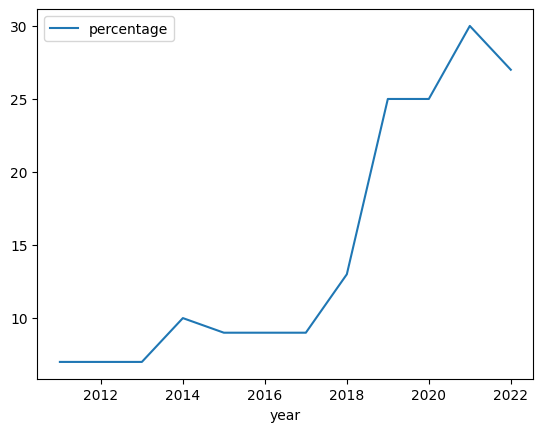

In [16]:
df = pd.read_csv('env_perceptions.csv')
df.columns=["year","percentage"]

df.set_index('year', inplace=True)
df.plot()
print(df)

In [17]:
def adfuller_test(ppm):
    result = adfuller(ppm)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value, label in zip(result,labels):
        print(f'{label}: {value}' )

    print('Stationary' if result[1] <= 0.05 else 'Non-stationary')

adfuller_test(df['percentage'])

ADF Test Statistic: 4.771330104787463
p-value: 1.0
#Lags Used: 4
Number of Observations: 7
Non-stationary


In [18]:
df['First Difference'] = df['percentage'] - df['percentage'].shift(1)
df['Seasonal First Difference']=df['percentage']-df['percentage'].shift(12)

df

,percentage,First Difference,Seasonal First Difference
year,,,
2011,7,NaN,NaN
2012,7,0.0,NaN
2013,7,0.0,NaN
2014,10,3.0,NaN
2015,9,-1.0,NaN
2016,9,0.0,NaN
2017,9,0.0,NaN
2018,13,4.0,NaN
2019,25,12.0,NaN


In [20]:
adfuller(df['Seasonal First Difference'].dropna().astype('int'))

ValueError: sample size is too short to use selected regression component

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())
plt.show()

In [ ]:
model = ARIMA(df['petrol'], order=(1,2,1))
model_fit = model.fit()
future_years = pd.date_range(start='2022', periods=5, freq='Y')
future_percentages = model_fit.forecast(steps=5).values
print(future_percentages)
